# Important libtraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv("churn.csv")

In [5]:
!pip install pandas numpy matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [6]:
df.head()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [7]:
df.shape

(5000, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [12]:
df.rename(columns={'account.length':'account_length','voice.plan':'voice_plan','voice.messages':'voice_messages',
                   'intl.plan':'intl_plan','intl.mins':'intl_mins','intl.calls':'intl_calls','intl.charge':'intl_charge',
                   'day.mins':'day_mins','day.calls':'day_calls','day.charge':'day_charge','eve.mins':'eve_mins',
                   'eve.calls':'eve_calls','eve.charge':'eve_charge','night.mins':'night_mins','night.calls':'night_calls',
                   'night.charge':'night_charge','customer.calls':'customer_calls'},inplace=True)
df

,Unnamed: 0,state,area.code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,...,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [13]:
df.drop(columns=['state','area.code'],inplace=True) # droping the categorical data
df

,Unnamed: 0,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,1,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,61,no,0,no,13.6,4,3.67,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,109,no,0,no,8.5,6,2.30,188.8,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [14]:
df.dtypes



Unnamed: 0          int64
account_length      int64
voice_plan         object
voice_messages      int64
intl_plan          object
intl_mins         float64
intl_calls          int64
intl_charge       float64
day_mins          float64
day_calls           int64
day_charge         object
eve_mins           object
eve_calls           int64
eve_charge        float64
night_mins        float64
night_calls         int64
night_charge      float64
customer_calls      int64
churn              object
dtype: object

In [15]:
df.describe(include='all')

,Unnamed: 0,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
count,5000.000000,5000.00000,5000,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000
unique,NaN,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,1962,1877,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,no,NaN,no,NaN,NaN,NaN,NaN,NaN,26.18,Nan,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,NaN,3677,NaN,4527,NaN,NaN,NaN,NaN,NaN,10,24,NaN,NaN,NaN,NaN,NaN,NaN,4293
mean,2500.500000,100.25860,NaN,7.755200,NaN,10.261780,4.435200,2.771196,180.288900,100.029400,NaN,NaN,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400,NaN
std,1443.520003,39.69456,NaN,13.546393,NaN,2.761396,2.456788,0.745514,53.894699,19.831197,NaN,NaN,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363,NaN
min,1.000000,1.00000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1250.750000,73.00000,NaN,0.000000,NaN,8.500000,3.000000,2.300000,143.700000,87.000000,NaN,NaN,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000,NaN
50%,2500.500000,100.00000,NaN,0.000000,NaN,10.300000,4.000000,2.780000,180.100000,100.000000,NaN,NaN,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000,NaN
75%,3750.250000,127.00000,NaN,17.000000,NaN,12.000000,6.000000,3.240000,216.200000,113.000000,NaN,NaN,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000,NaN


In [16]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [17]:
df.isna().sum()

Unnamed: 0        0
account_length    0
voice_plan        0
voice_messages    0
intl_plan         0
intl_mins         0
intl_calls        0
intl_charge       0
day_mins          0
day_calls         0
day_charge        0
eve_mins          0
eve_calls         0
eve_charge        0
night_mins        0
night_calls       0
night_charge      0
customer_calls    0
churn             0
dtype: int64

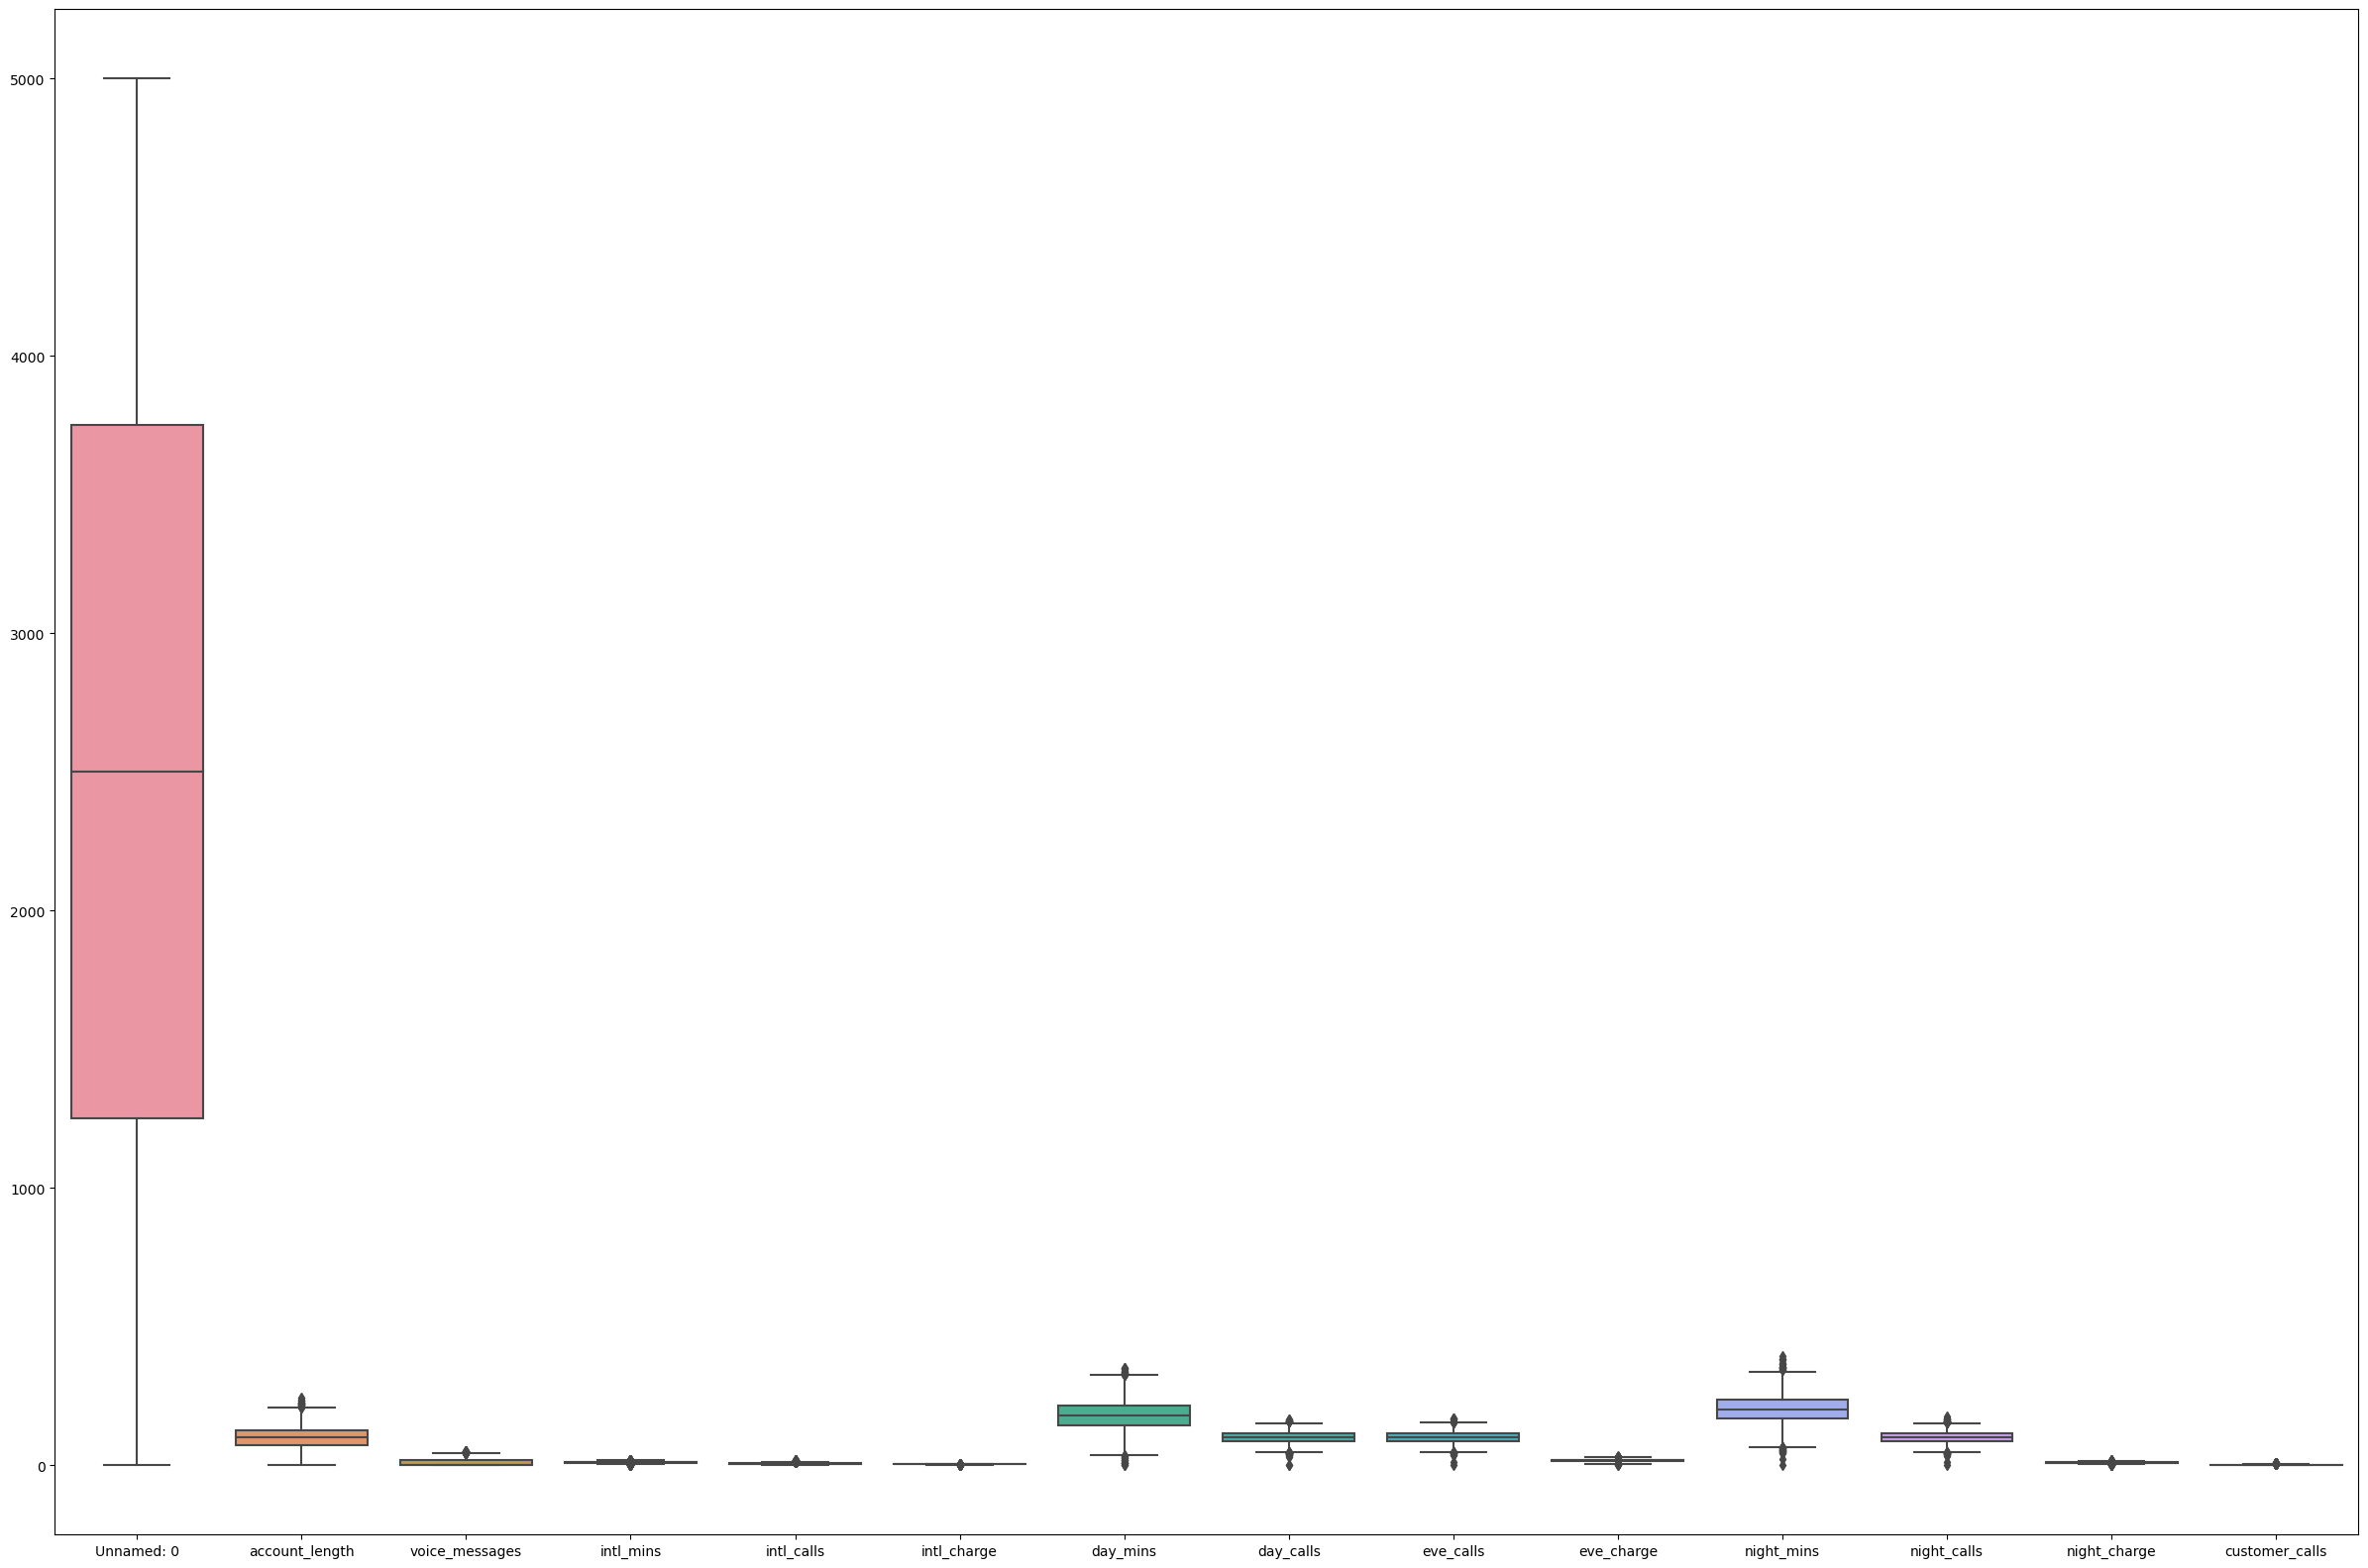

In [20]:
plt.figure(figsize=(30,20))
sns.boxplot(df)
plt.show()

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'account_length'}>,
        <Axes: title={'center': 'voice_messages'}>,
        <Axes: title={'center': 'intl_mins'}>],
       [<Axes: title={'center': 'intl_calls'}>,
        <Axes: title={'center': 'intl_charge'}>,
        <Axes: title={'center': 'day_mins'}>,
        <Axes: title={'center': 'day_calls'}>],
       [<Axes: title={'center': 'eve_calls'}>,
        <Axes: title={'center': 'eve_charge'}>,
        <Axes: title={'center': 'night_mins'}>,
        <Axes: title={'center': 'night_calls'}>],
       [<Axes: title={'center': 'night_charge'}>,
        <Axes: title={'center': 'customer_calls'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 3000x2000 with 0 Axes>

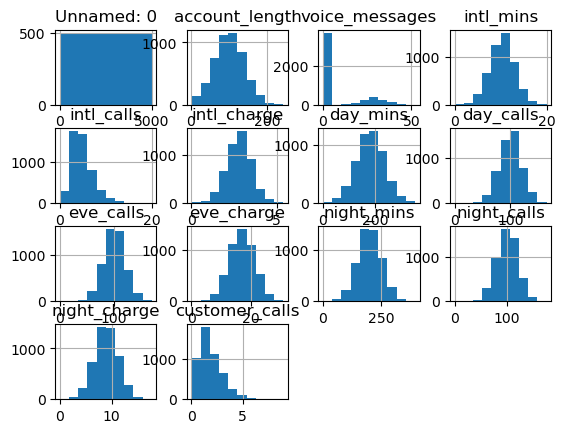

In [26]:
plt.figure(figsize=(30,20))
df.hist()

In [24]:
#Printing the unique value inside "churn" column
df["churn"].unique()

array(['no', 'yes'], dtype=object)

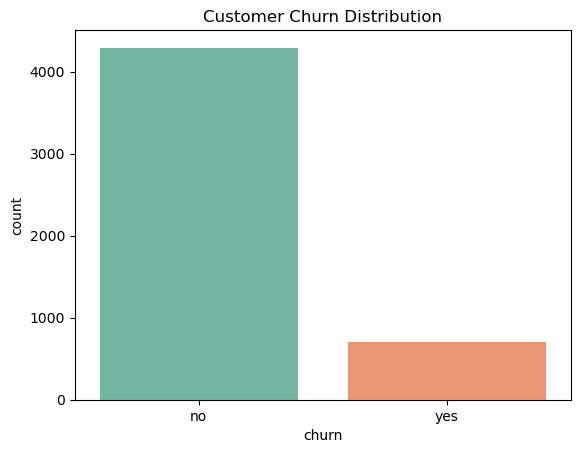

In [29]:
# Countplot for Churn distribution
sns.countplot(x='churn', data=df, palette='Set2')
plt.title("Customer Churn Distribution")
plt.show()


In [33]:
df

,Unnamed: 0,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,1,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,61,no,0,no,13.6,4,3.67,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,109,no,0,no,8.5,6,2.30,188.8,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


<Axes: ylabel='count'>

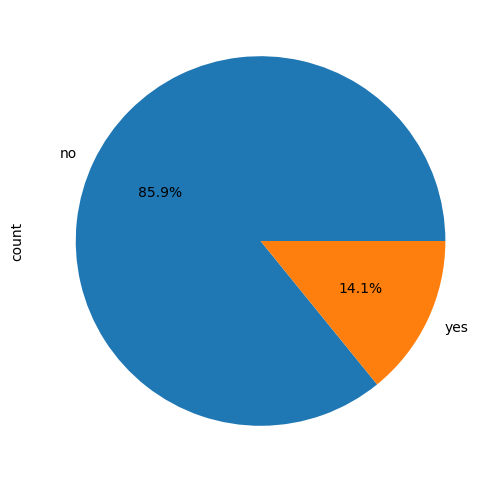

In [36]:
df['churn'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))


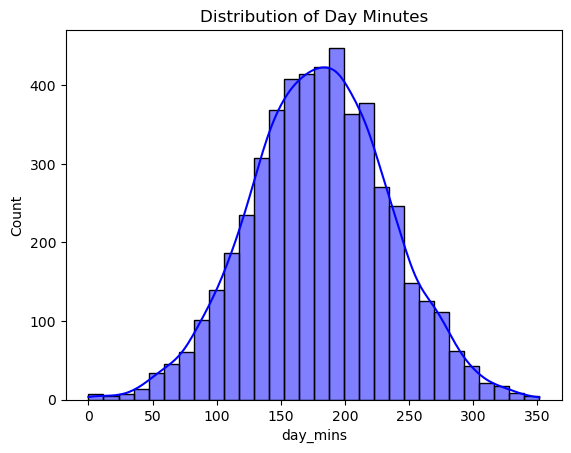

In [40]:


sns.histplot(df['day_mins'], bins=30, kde=True, color='blue')
plt.title("Distribution of Day Minutes")
plt.show()


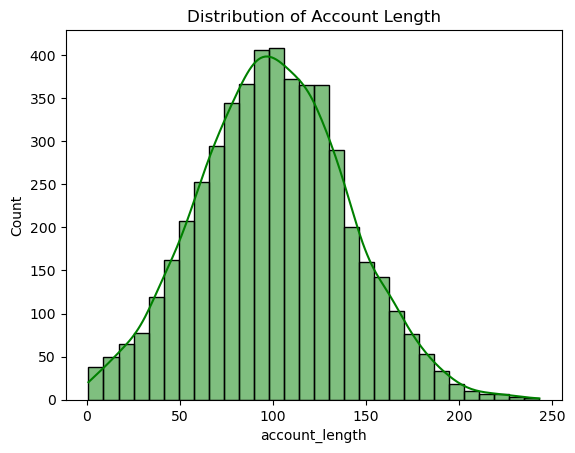

In [42]:
sns.histplot(df['account_length'], bins=30, kde=True, color='green')
plt.title("Distribution of Account Length")
plt.show()


<Axes: xlabel='day_mins', ylabel='Count'>

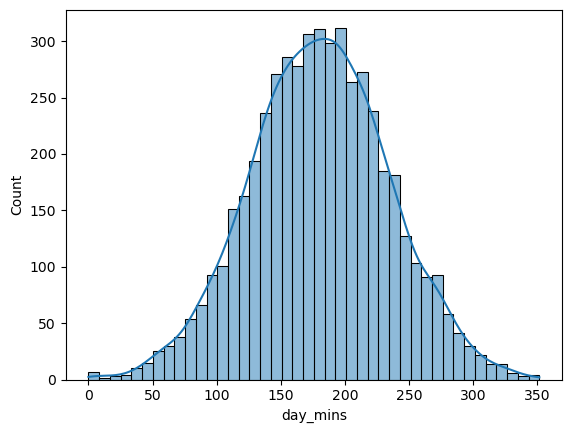

In [44]:
sns.histplot(df['day_mins'], kde=True)


In [46]:
# Drop Unnamed: 0 if still exists
if "Unnamed: 0" in df.columns:
    df = df.drop("Unnamed: 0", axis=1)

In [48]:
# Encode categorical yes/no, churn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = le.fit_transform(df[col])

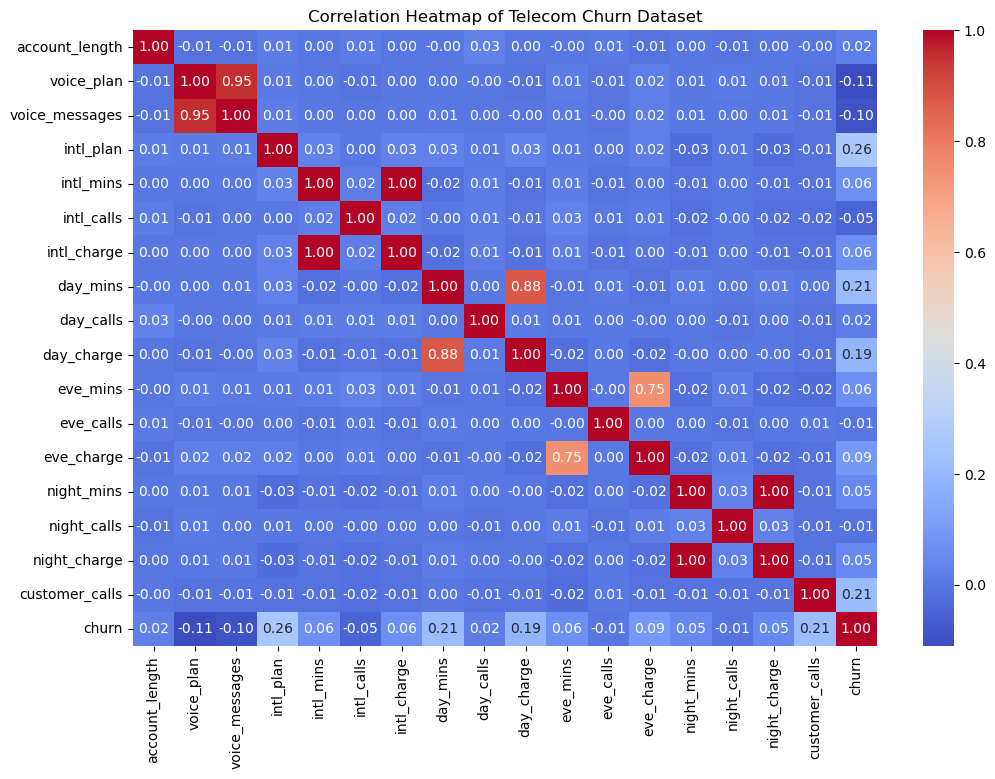

In [50]:
# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Telecom Churn Dataset")
plt.show()

In [53]:
X = df.drop("churn", axis=1)
y = df["churn"]


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [56]:
y_pred = clf.predict(X_test)

In [57]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.943

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       861
           1       0.89      0.68      0.77       139

    accuracy                           0.94      1000
   macro avg       0.92      0.83      0.87      1000
weighted avg       0.94      0.94      0.94      1000



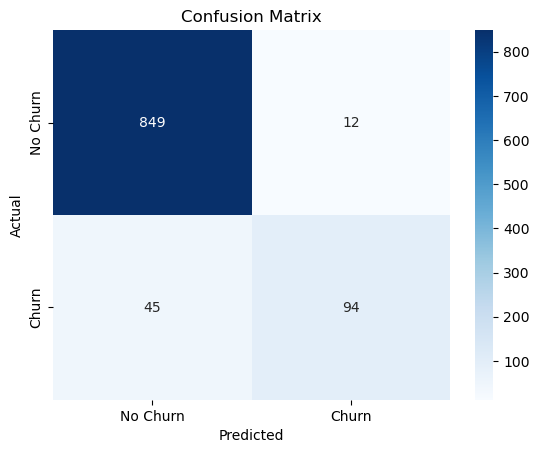

In [58]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

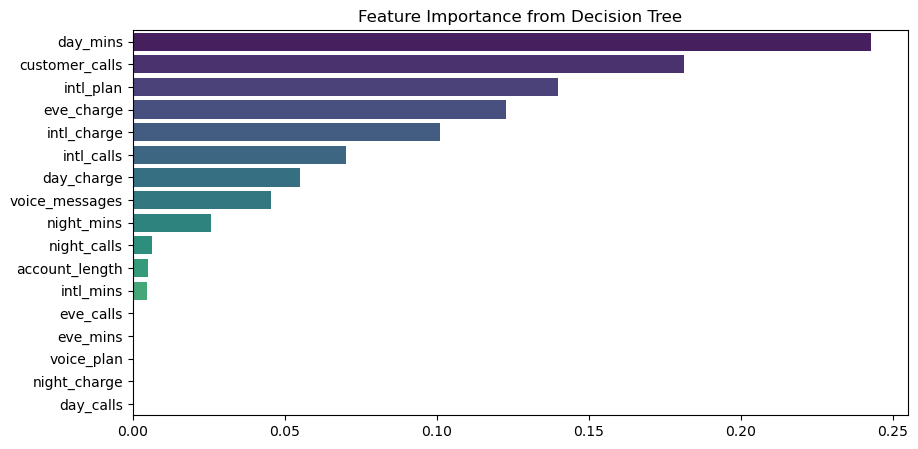

In [59]:
feat_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=feat_importance, y=feat_importance.index, palette="viridis")
plt.title("Feature Importance from Decision Tree")
plt.show()